# EDA on Astronauts Data


In [183]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [169]:
df_astronauts = pd.read_csv("astronauts.csv")
df_astronauts.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


### Null and Unique Values

In [170]:
dtypes = df_astronauts.dtypes
Null_values = df_astronauts.isna().sum()    
df_astronauts['Year'].value_counts()
df_astronauts.nunique()

Name                   357
Year                    20
Group                   20
Status                   4
Birth Date             348
Birth Place            272
Gender                   2
Alma Mater             280
Undergraduate Major     83
Graduate Major         143
Military Rank           12
Military Branch         14
Space Flights            8
Space Flight (hr)      270
Space Walks             11
Space Walks (hr)        52
Missions               305
Death Date              38
Death Mission            3
dtype: int64

### Missing Values Analysis

Text(0.5, 1.0, 'Total Missing Values')

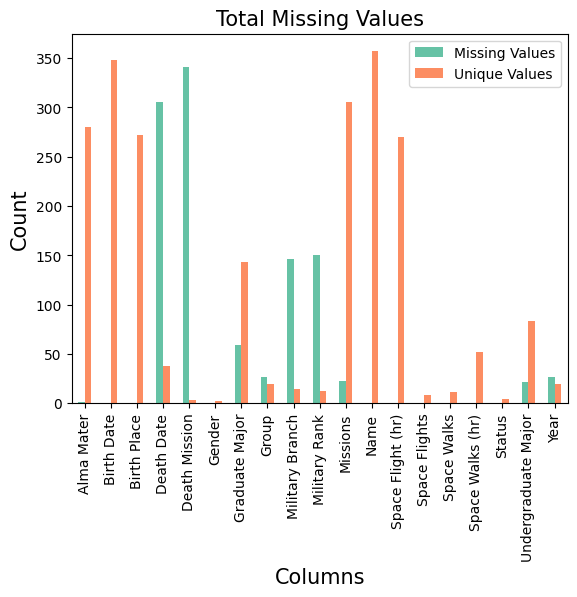

In [171]:
missingValues = df_astronauts.isna().sum().sort_values(ascending=False) 
unique_values = df_astronauts.nunique().sort_values(ascending=False)
summary = pd.DataFrame({
    'Missing Values': missingValues,
    'Unique Values': unique_values
})
summary.plot(kind='bar')
plt.xlabel("Columns", fontsize = 15)
plt.ylabel("Count", fontsize =  15)
plt.title("Total Missing Values", fontsize = 15)




### Mean, Median, Mode 
Using df_numerics : Mean and Median calculated for numerical columns.


In [172]:
df_numerics = df_astronauts.select_dtypes(include = ["number"])

mean_values = df_numerics.mean()
median = df_numerics.median()
mode = df_astronauts.mode()

print("Mean \n",mean_values) 
print("\nMedian \n",median)
print("\nMode \n", mode.iloc[0])

Mean 
 Year                 1985.106061
Group                  11.409091
Space Flights           2.364146
Space Flight (hr)    1249.266106
Space Walks             1.246499
Space Walks (hr)        7.707283
dtype: float64

Median 
 Year                 1987.0
Group                  12.0
Space Flights           2.0
Space Flight (hr)     590.0
Space Walks             0.0
Space Walks (hr)        0.0
dtype: float64

Mode 
 Name                       Alan B. Shepard Jr. 
Year                                     1978.0
Group                                       8.0
Status                                  Retired
Birth Date                           10/27/1946
Birth Place                       Cleveland, OH
Gender                                     Male
Alma Mater                     US Naval Academy
Undergraduate Major                     Physics
Graduate Major         Aeronautical Engineering
Military Rank                           Colonel
Military Branch          US Air Force (Retired)
Spa

# Visualizations

## Trend Analysis

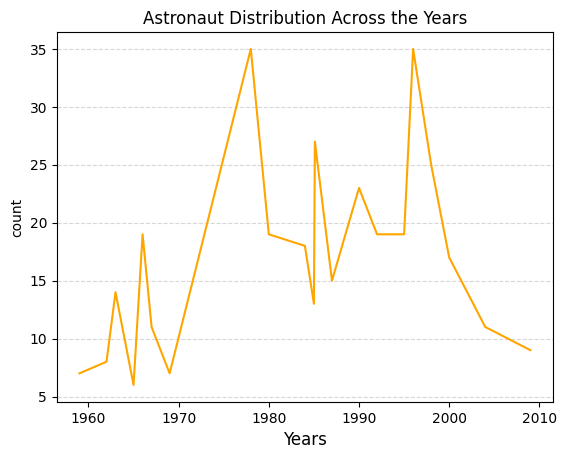

In [200]:
yearly_counts = df_astronauts.groupby('Year').size().reset_index(name='count' )

sns.lineplot(x = 'Year',y = 'count',data = yearly_counts,color = 'orange' )
plt.xlabel('Years', fontsize=12)
plt.title('Astronaut Distribution Across the Years')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Grouped Aggregation

In [175]:

field_of_study = df_astronauts.groupby('Undergraduate Major').size().reset_index(name='Count')
top_fields = field_of_study.sort_values(by=['Count'])[-10:]

### Top Undergraduate Majors by Count of Astronauts

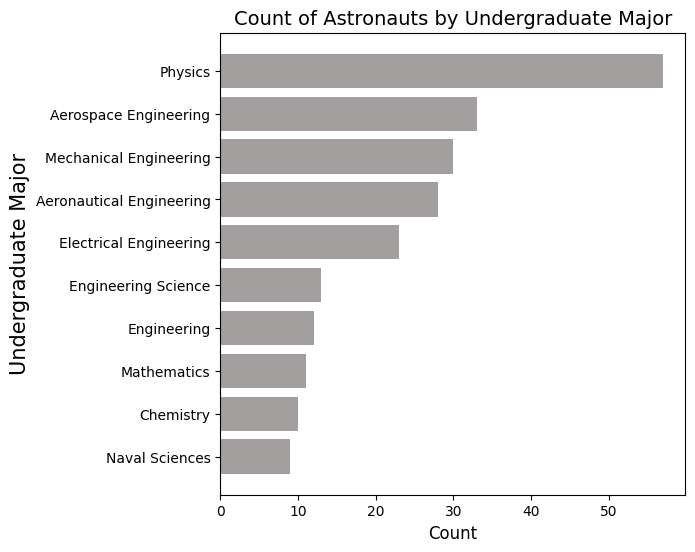

In [201]:
plt.figure(figsize=(6,6))
plt.barh(top_fields['Undergraduate Major'], top_fields['Count'], color="#A39F9F" )
plt.ylabel('Undergraduate Major', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.title('Count of Astronauts by Undergraduate Major', fontsize=14)
 
plt.show()

### Space Walk Count and Total Hours Spent

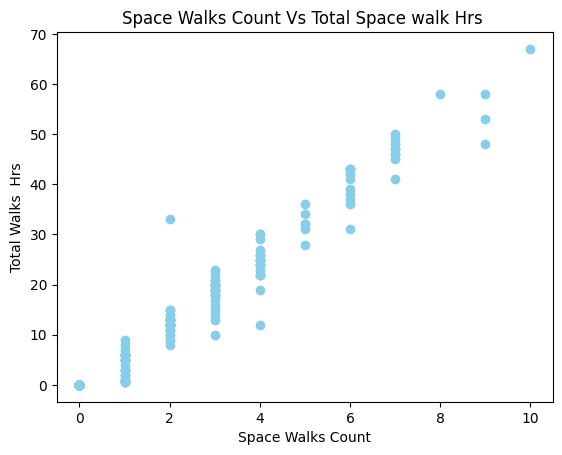

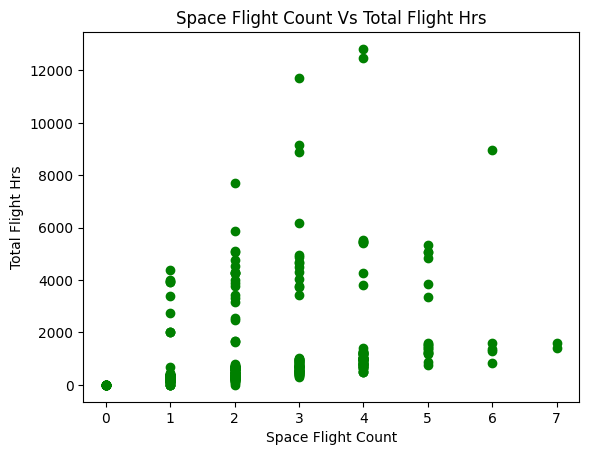

In [191]:

plt.scatter(x = df_astronauts['Space Walks'] ,y = df_astronauts['Space Walks (hr)'], color = 'SkyBlue')
plt.title('Space Walks Count Vs Total Space walk Hrs ')
plt.xlabel('Space Walks Count')
plt.ylabel('Total Walks  Hrs')
plt.show()

plt.scatter(x = df_astronauts['Space Flights'] ,y = df_astronauts['Space Flight (hr)'], color='Green' )
plt.title('Space Flight Count Vs Total Flight Hrs')
plt.xlabel('Space Flight Count')
plt.ylabel('Total Flight Hrs')
plt.show()


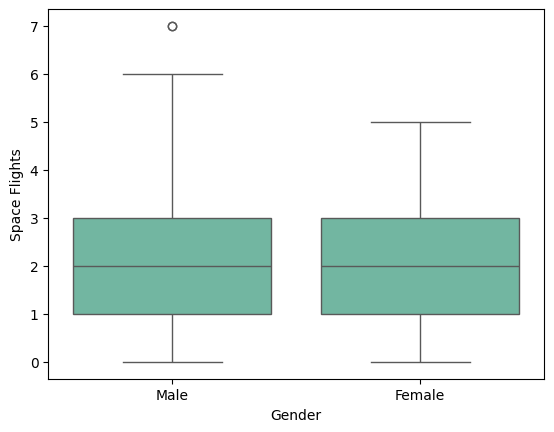

In [178]:

fig, ax = plt.subplots()
sns.boxplot(x='Gender', y='Space Flights', data=df_astronauts,ax = ax)
plt.show()

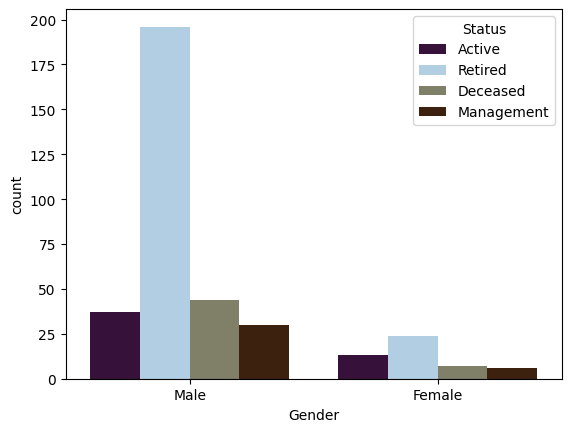

In [205]:
status_palette = {
    'Active': "#3b0b41",      # muted blue
    'Retired': "#aacfea",     # muted orange
    'Deceased': "#848464",    # professional green
    'Management': "#441f07"   # muted purple
}

sns.countplot(x='Gender', hue='Status', data=df_astronauts,palette= status_palette) 
plt.show()


# Correlation Analysis

Decode Gender 

In [180]:
df_astronauts['DecodeGender'] = df_astronauts['Gender'].map({'Male': 1, 'Female': 0})

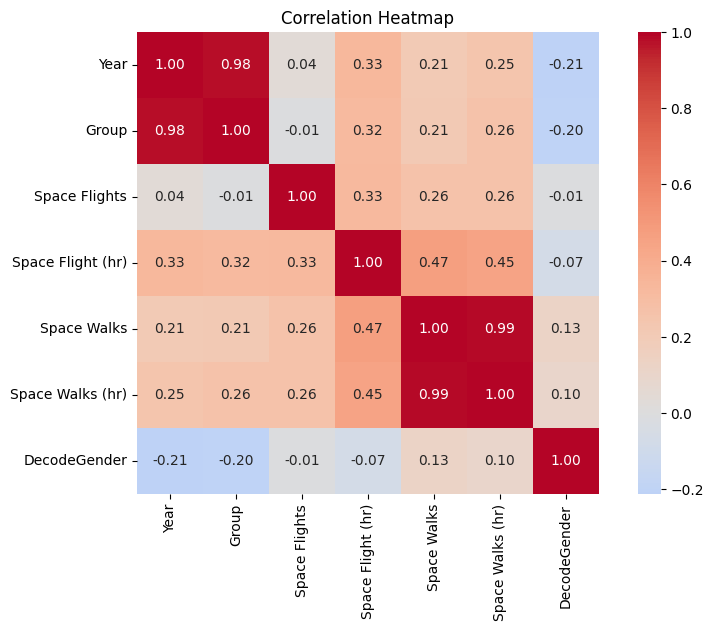

In [181]:
 
corr = df_astronauts.corr(numeric_only=True)  # Use numeric columns only

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [184]:
df_numerics = df_astronauts.select_dtypes(include = ['float64', 'int64'])
corr = df_numerics.corr()['Space Flight (hr)'].sort_values(ascending= False)[1:]
corr
 


Space Walks         0.472796
Space Walks (hr)    0.454408
Year                0.327684
Space Flights       0.325233
Group               0.322045
DecodeGender       -0.069893
Name: Space Flight (hr), dtype: float64

## Handling Missing Values

There are 3 ways to handle missing values:

1. **Remove**  
  
2. **Replace**  
   Replace missing values with:
   - Mean (for numerical data)
   - Mode (for categorical/string data)  
3. **Mask**  
   Use a special placeholder value to indicate missingness without altering data.


In [206]:
for col in df_astronauts.columns:
    if df_astronauts[col].dtype in ["float64", "int64"] : 
        df_astronauts[col].fillna(df_astronauts[col].mean())
    
    else:
        df_astronauts[col].fillna(df_astronauts[col].mode().iloc[0])
         
df_astronauts.isna().sum()

Name                   0
Year                   0
Group                  0
Status                 0
Birth Date             0
Birth Place            0
Gender                 0
Alma Mater             0
Undergraduate Major    0
Graduate Major         0
Military Rank          0
Military Branch        0
Space Flights          0
Space Flight (hr)      0
Space Walks            0
Space Walks (hr)       0
Missions               0
Death Date             0
Death Mission          0
DecodeGender           0
dtype: int64